In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ROOT_DIR='/content/gdrive/MyDrive/YOLO-DATA/dataset'

In [3]:

# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.7/112.6 GB disk)


In [4]:

from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd /content/gdrive/MyDrive/YOLO-DATA/dataset

/content/gdrive/MyDrive/YOLO-DATA/dataset


In [10]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
Ultral

In [ ]:
!ls runs/detect/train/

args.yaml					     R_curve.png	 train_batch182.jpg
confusion_matrix.png				     results.csv	 train_batch1.jpg
events.out.tfevents.1724072304.1994f4a9feeb.24332.0  results.png	 train_batch2.jpg
F1_curve.png					     train_batch0.jpg	 val_batch0_labels.jpg
P_curve.png					     train_batch180.jpg  val_batch0_pred.jpg
PR_curve.png					     train_batch181.jpg  weights


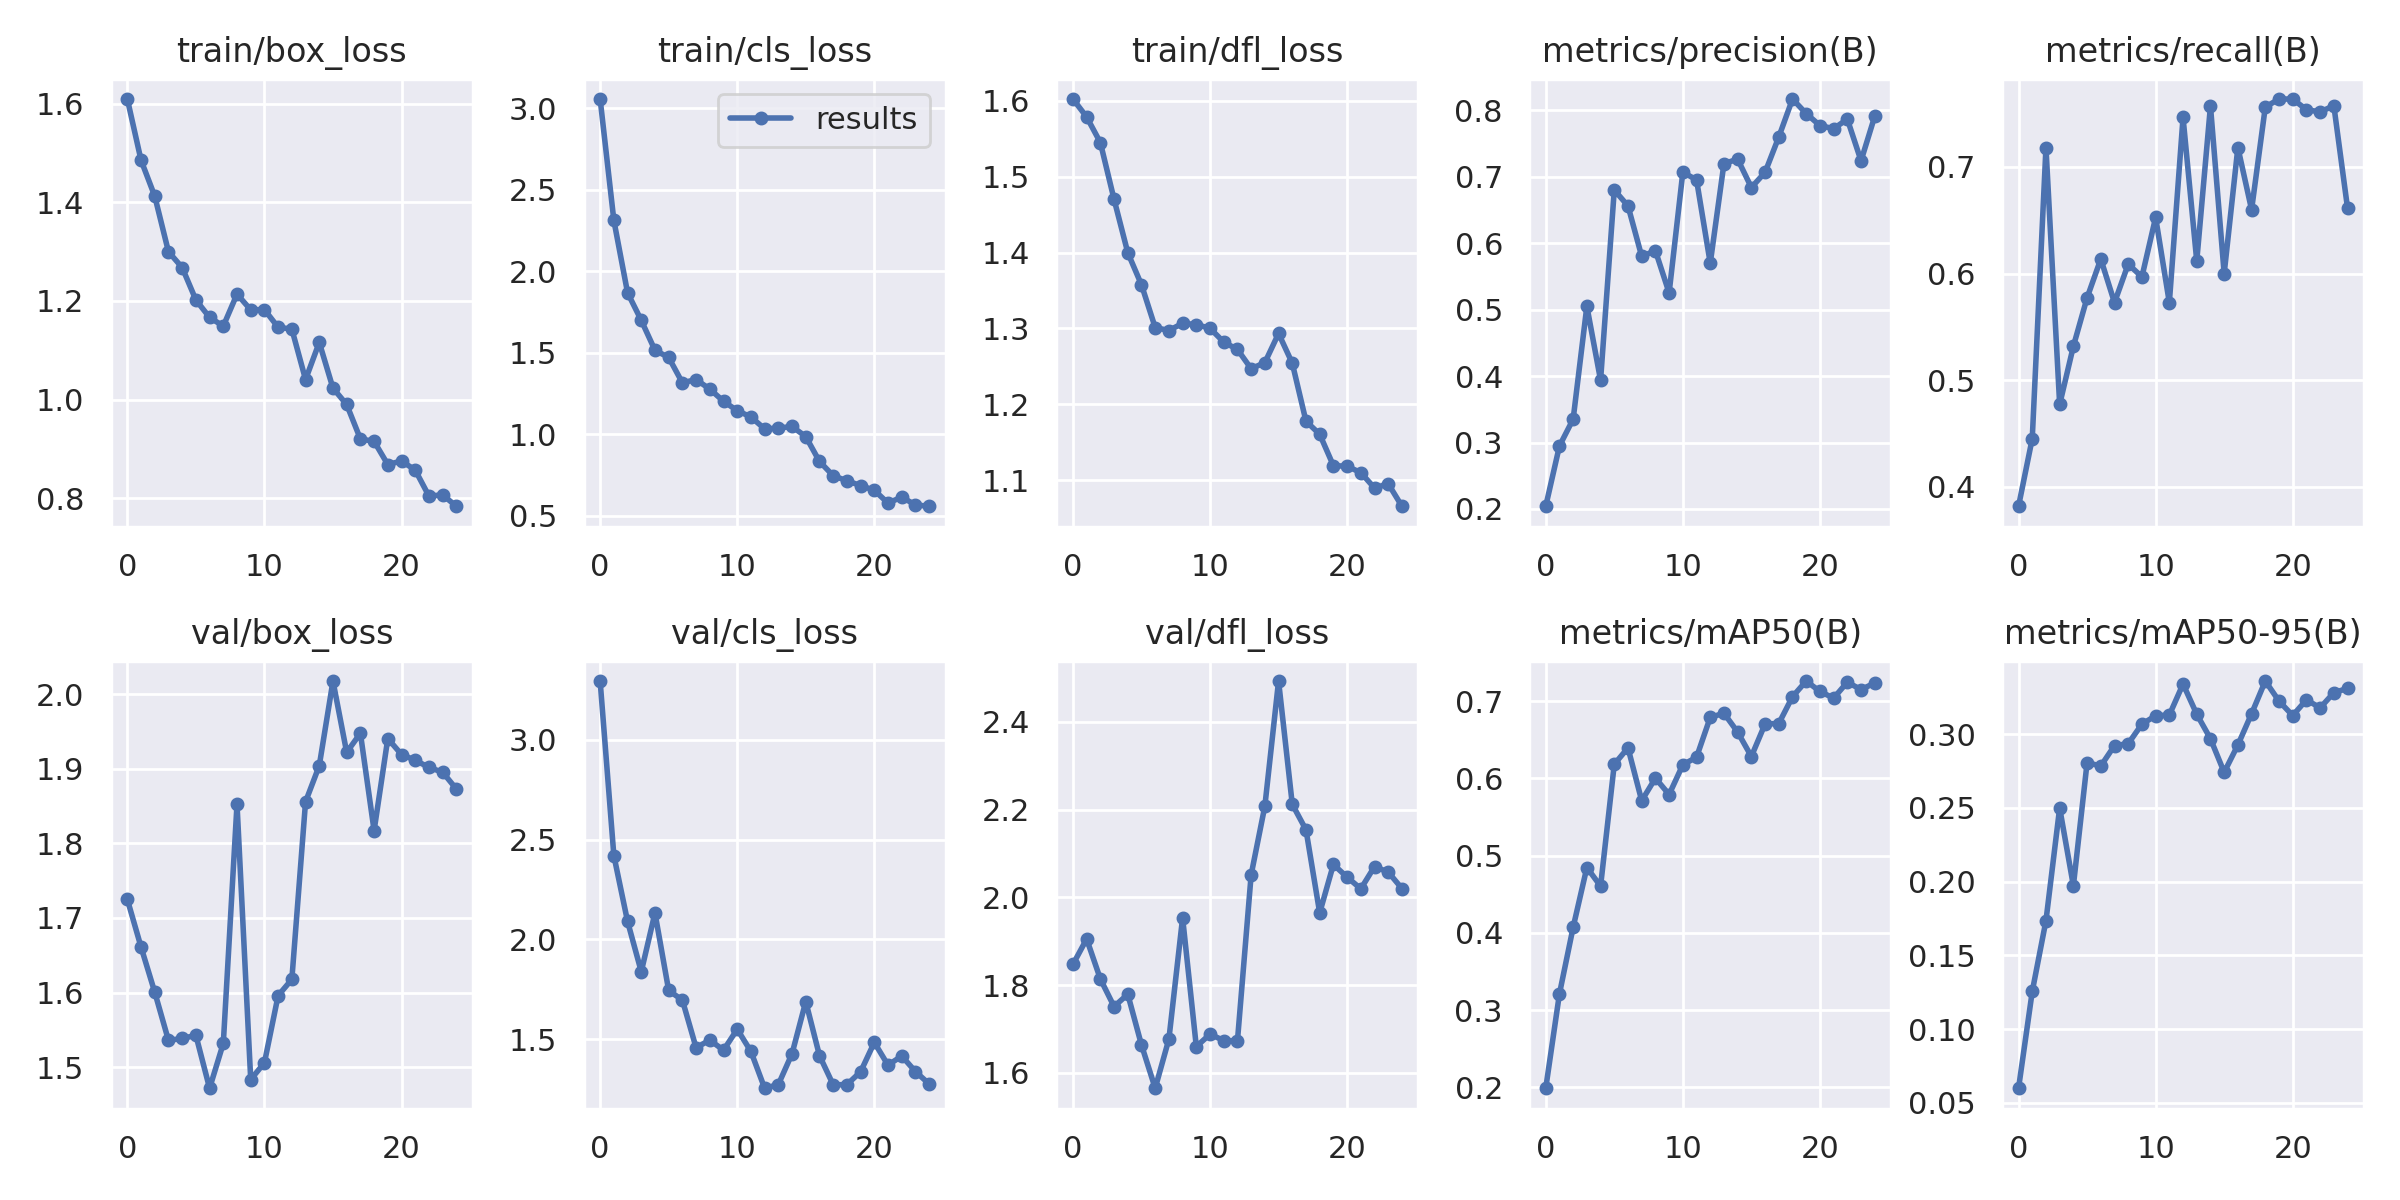

In [ ]:

Image(filename='runs/detect/train/results.png', width=600)

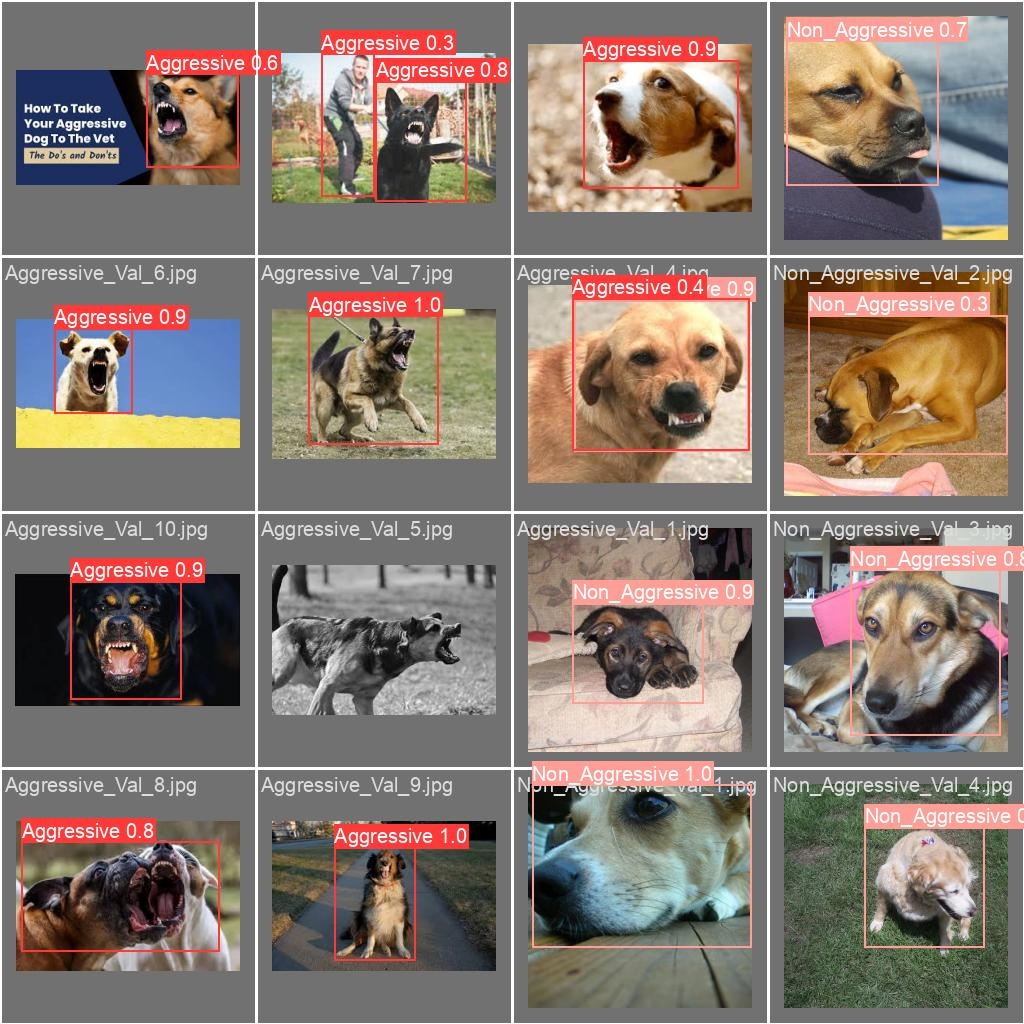

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/gdrive/MyDrive/YOLO-DATA/dataset/test/images save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_1.jpg: 160x224 1 Aggressive, 67.7ms
image 2/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_10.jpg: 192x224 1 Aggressive, 67.4ms
image 3/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_11.jpg: 160x224 2 Aggressives, 8.0ms
image 4/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_12.jpg: 192x224 1 Aggressive, 9.4ms
image 5/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_13.jpg: 224x224 1 Non_Aggressive, 7.8ms
image 6/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_14.jpg: 224x192 2 Aggressives, 64.5ms
image 7/59 /content/gdrive/MyDrive/YOLO-DATA/dataset/test/images/Aggressive_Test_15.jpg: 96x224 2 Aggressives, 75.9ms
imag

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best.pt")


In [ ]:
# Export the model to TensorFlow SavedModel format
model.export(format="saved_model")  # This will create a directory named '/yolov8n_saved_model'


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from '/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best.pt' with input shape (1, 3, 224, 224) BCHW and output shape(s) (1, 6, 1029) (21.4 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.6/136.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 160.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 209.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 252.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

100%|██████████| 1.11M/1.11M [00:00<00:00, 46.1MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 39.23file/s]


ONNX: starting export with onnx 1.16.2 opset 17...


ONNX: slimming with onnxslim 0.1.32...
ONNX: export success ✅ 2.0s, saved as '/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best.onnx' (42.5 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 42.7s, saved as '/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best_saved_model' (106.4 MB)

Export complete (45.0s)
Results saved to /content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best_saved_model imgsz=224  
Validate:        yolo val task=detect model=/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best_saved_model imgsz=224 data=data.yaml  
Visualize:       https://netron.app


'/content/gdrive/MyDrive/YOLO-DATA/dataset/runs/detect/train/weights/best_saved_model'

In [ ]:
!pip install --upgrade ultralytics


  Using cached ultralytics-8.2.79-py3-none-any.whl.metadata (41 kB)
Using cached ultralytics-8.2.79-py3-none-any.whl (869 kB)
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20
